Построение метро Москвы

In [1]:
import csv
import random
from random import randint
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import random 
import numpy as np
import copy

In [2]:
file = csv.reader("метро.csv", delimiter = ",")
matrix_1 = []
with open("метро.csv") as file:
    reader = csv.reader(file, delimiter=',', quotechar=',')
    for row in reader:
        matrix_1.append(row)
t=[matrix_1[i][0] for i in range(len(matrix_1))]
print("Выводим список всех станций")
print(len(t))
t

Выводим список всех станций
250


['Бульвар Рокоссовского',
 'Черкизовская ',
 'Преображенская площадь',
 'Сокольники',
 'Красносельская ',
 'Комсомольская ',
 'Красные Ворота',
 'Лермонтовская ',
 'Чистые пруды/Тургеневская/Сретенский бульвар',
 'Кировская ',
 'Кузнецкий Мост/Лубянка',
 'Дзержинская ',
 'Охотный Ряд/Театральная/Площадь Революции',
 'Библиотека имени Ленина/Александровский сад/Арбатская/Боровицкая',
 'Кропоткинская',
 'Парк культуры',
 'Фрунзенская ',
 'Спортивная ',
 'Воробьёвы горы',
 'Университет',
 'Пр. Вернадского',
 'Юго-Западная ',
 'Тропарёво',
 'Румянцево',
 'Саларьево',
 'Филатов луг',
 'Прошкино',
 'Ольховая ',
 'Коммунарка',
 'Речной вокзал',
 'Водный стадион',
 'Войковская ',
 'Сокол',
 'Аэропорт',
 'Динамо/Петровский парк',
 'Белорусская ',
 'Маяковская ',
 'Тверская/Пушкинская/Чеховская',
 'Горьковская ',
 'Театральная',
 'Площадь Свердлова',
 'Новокузнецкая/Третьяковская',
 'Павелецкая ',
 'Автозаводская',
 'Завод имени Сталина ',
 'Технопарк',
 'Коломенская ',
 'Каширская ',
 'Кантемир

In [3]:
#Массив без повторяющихся станций
print("Создаем список без повторяющихся станций")
b=[]
for i in t:
    if i not in b:
        b.append(i)

Создаем список без повторяющихся станций


In [4]:
g = nx.Graph()
g.add_nodes_from(t)

In [5]:
#Создаем граф со всеми возможными связями и записываем цвета для каждого участка графа(или ветки метро)
s = [29, 26, 23, 13, 13, 24, 23, 8, 12, 25, 23, 6, 14, 7, 4]
n=-1
k = 0
a=[]
a1=[]
color=['red','green','blue','cyan','sienna','orange','darkviolet','gold','gold','gray','lawngreen','c','c','thistle','pink']
for i in range(len(s)):
    n = n + s[i] 
    for j in range(k,n):
        ch=random.randint(3,7)
        g.add_edge(t[j],t[j+1],weigth=ch,color_node=color[i])
        a.append((t[j],t[j+1],ch))
        ch=0
    k = k+s[i]
for i in g.edges(data=True):
    i=str(i)
    ind=i.find('node')
    a1.append(i[ind+8:-3])

In [6]:
print("Созданный граф и кол-во ребер")
print(len(g.edges(data=True)))
print(g.edges(data=True))

Созданный граф и кол-во ребер
234
[('Бульвар Рокоссовского', 'Черкизовская ', {'weigth': 6, 'color_node': 'red'}), ('Черкизовская ', 'Преображенская площадь', {'weigth': 3, 'color_node': 'red'}), ('Преображенская площадь', 'Сокольники', {'weigth': 7, 'color_node': 'red'}), ('Сокольники', 'Красносельская ', {'weigth': 3, 'color_node': 'red'}), ('Красносельская ', 'Комсомольская ', {'weigth': 4, 'color_node': 'red'}), ('Комсомольская ', 'Красные Ворота', {'weigth': 5, 'color_node': 'red'}), ('Красные Ворота', 'Лермонтовская ', {'weigth': 6, 'color_node': 'red'}), ('Лермонтовская ', 'Чистые пруды/Тургеневская/Сретенский бульвар', {'weigth': 3, 'color_node': 'red'}), ('Чистые пруды/Тургеневская/Сретенский бульвар', 'Кировская ', {'weigth': 6, 'color_node': 'red'}), ('Чистые пруды/Тургеневская/Сретенский бульвар', 'Сухаревская', {'weigth': 5, 'color_node': 'orange'}), ('Чистые пруды/Тургеневская/Сретенский бульвар', 'Китай-город', {'weigth': 6, 'color_node': 'orange'}), ('Чистые пруды/Турге

Алгоритм расставления точек доставки

In [7]:
#Считаем длину пути по ребрам
def len_part(path, G):
    length = 0
    for i in range(0, len(path) - 1):
        x0 = path[i]
        x1 = path[i + 1]
        for conn in G:
            if x0 in conn and x1 in conn:
                length += conn[2]
    return length


def min_points(v, G, T):
    metro = nx.Graph()
    metro.add_weighted_edges_from(G)
    end = [] 
    unprocessed = copy.copy(v) 
    processed = []
    long = [] 
    while len(unprocessed) > 1:
        x0 = unprocessed[0] #Берем вершину первую из непроверенных точек и идем от неё в разные стороны, до всех отсальных точек в списке
        end.append(x0) #Добавляем в итоговый список станций 
        for i in range(1, len(unprocessed)): # Зесь находим кратчайший путь от нулевой точки до текущей и проверяем больше ли расстояние указанного времени
            xn = unprocessed[i] #Если больше, то добавляем в непроверенные точки, если меньше, то в проверенные 
            path = nx.shortest_path(metro, x0, xn)
            if len_part(path, G) <= T:
                processed.append(xn)
            else:
                long.append(xn)
        unprocessed = long
        long = []
    end + unprocessed
    return end # Список с нужными станциями

In [8]:
points = min_points(b, a, 20)
print(points)
print(len(points))

['Бульвар Рокоссовского', 'Комсомольская ', 'Кузнецкий Мост/Лубянка', 'Фрунзенская ', 'Юго-Западная ', 'Прошкино', 'Речной вокзал', 'Динамо/Петровский парк', 'Автозаводская', 'Кантемировская', 'Красногвардейская/Зябликово', 'Пятницкое шоссе', 'Строгино', 'Бауманская ', 'Измайловская ', 'Пионерская ', 'Комсомольская', 'Медведково', 'Ленинский проспект', 'Калужская/Воронцовская', 'Новоясеневская/Битцевский парк', 'Планерная', 'Щукинская', 'Волгоградский проспект', 'Жулебино', 'Шоссе Энтузиастов', 'Рассказовка', 'Ломоносовский проспект', 'Алтуфьево', 'Петровско-Разумовская', 'Нагатинская ', 'Южная', 'Бульвар Дмитрия Донского', 'Печатники', 'Каширская', 'Кунцевская', 'Бульвар Адмирала Ушакова']
37


In [9]:
#Массив цветов для точек станций с лавками и без
a2=[]
for i in b:
    if i in points:
        a2.append('r') #Если нужно ставить лавку, то красный цвет станции
    else:
        a2.append('g') #Если не надо ставить лавку, то зеленый цвет станции

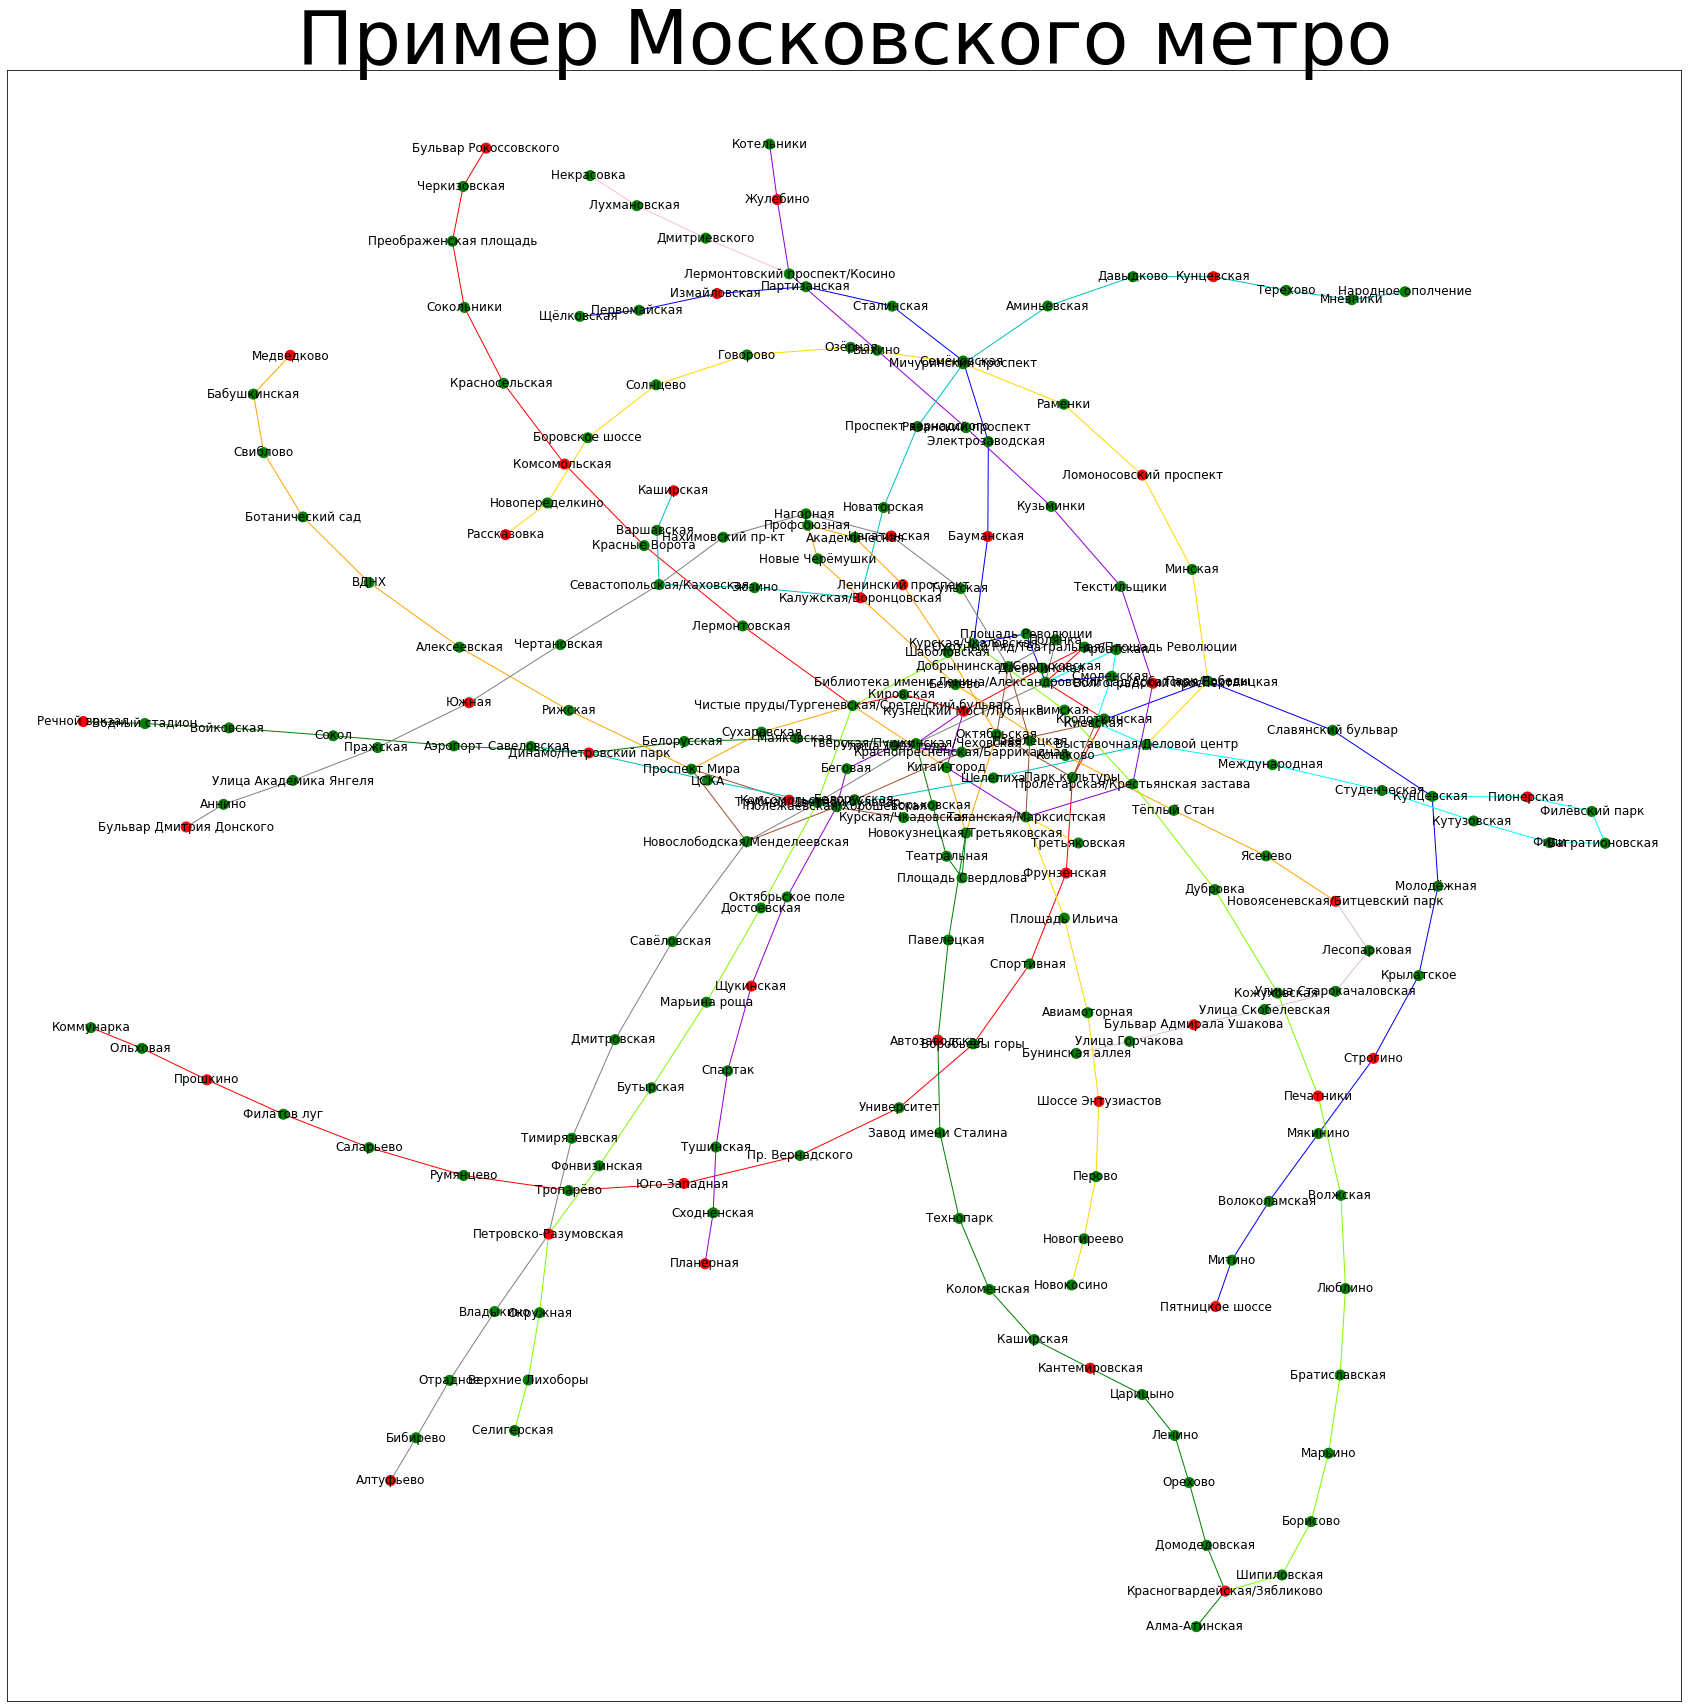

In [10]:
f = plt.figure(figsize=(30,30))
nx.draw_networkx(g,edge_color=a1,node_color=a2,node_size=100)
plt.title("Пример Московского метро",size=75)
plt.show()


Изменяем значение времени

In [11]:
points1 = min_points(b, a, 30)
print(points1)
print(len(points1))

['Бульвар Рокоссовского', 'Лермонтовская ', 'Спортивная ', 'Саларьево', 'Речной вокзал', 'Завод имени Сталина ', 'Орехово', 'Пятницкое шоссе', 'Молодёжная ', 'Сталинская ', 'Медведково', 'Академическая', 'Тёплый Стан', 'Планерная', 'Октябрьское поле', 'Рязанский проспект', 'Новогиреево', 'Рассказовка', 'Алтуфьево', 'Нагорная ', 'Улица Академика Янгеля', 'Селигерская ', 'Печатники', 'Аминьевская', 'Улица Горчакова']
25


In [12]:
#Массив цветов для точек станций с лавками и без
a3=[]
for i in b:
    if i in points1:
        a3.append('r') #Если нужно ставить лавку, то красный цвет станции
    else:
        a3.append('g') #Если не надо ставить лавку, то зеленый цвет станции

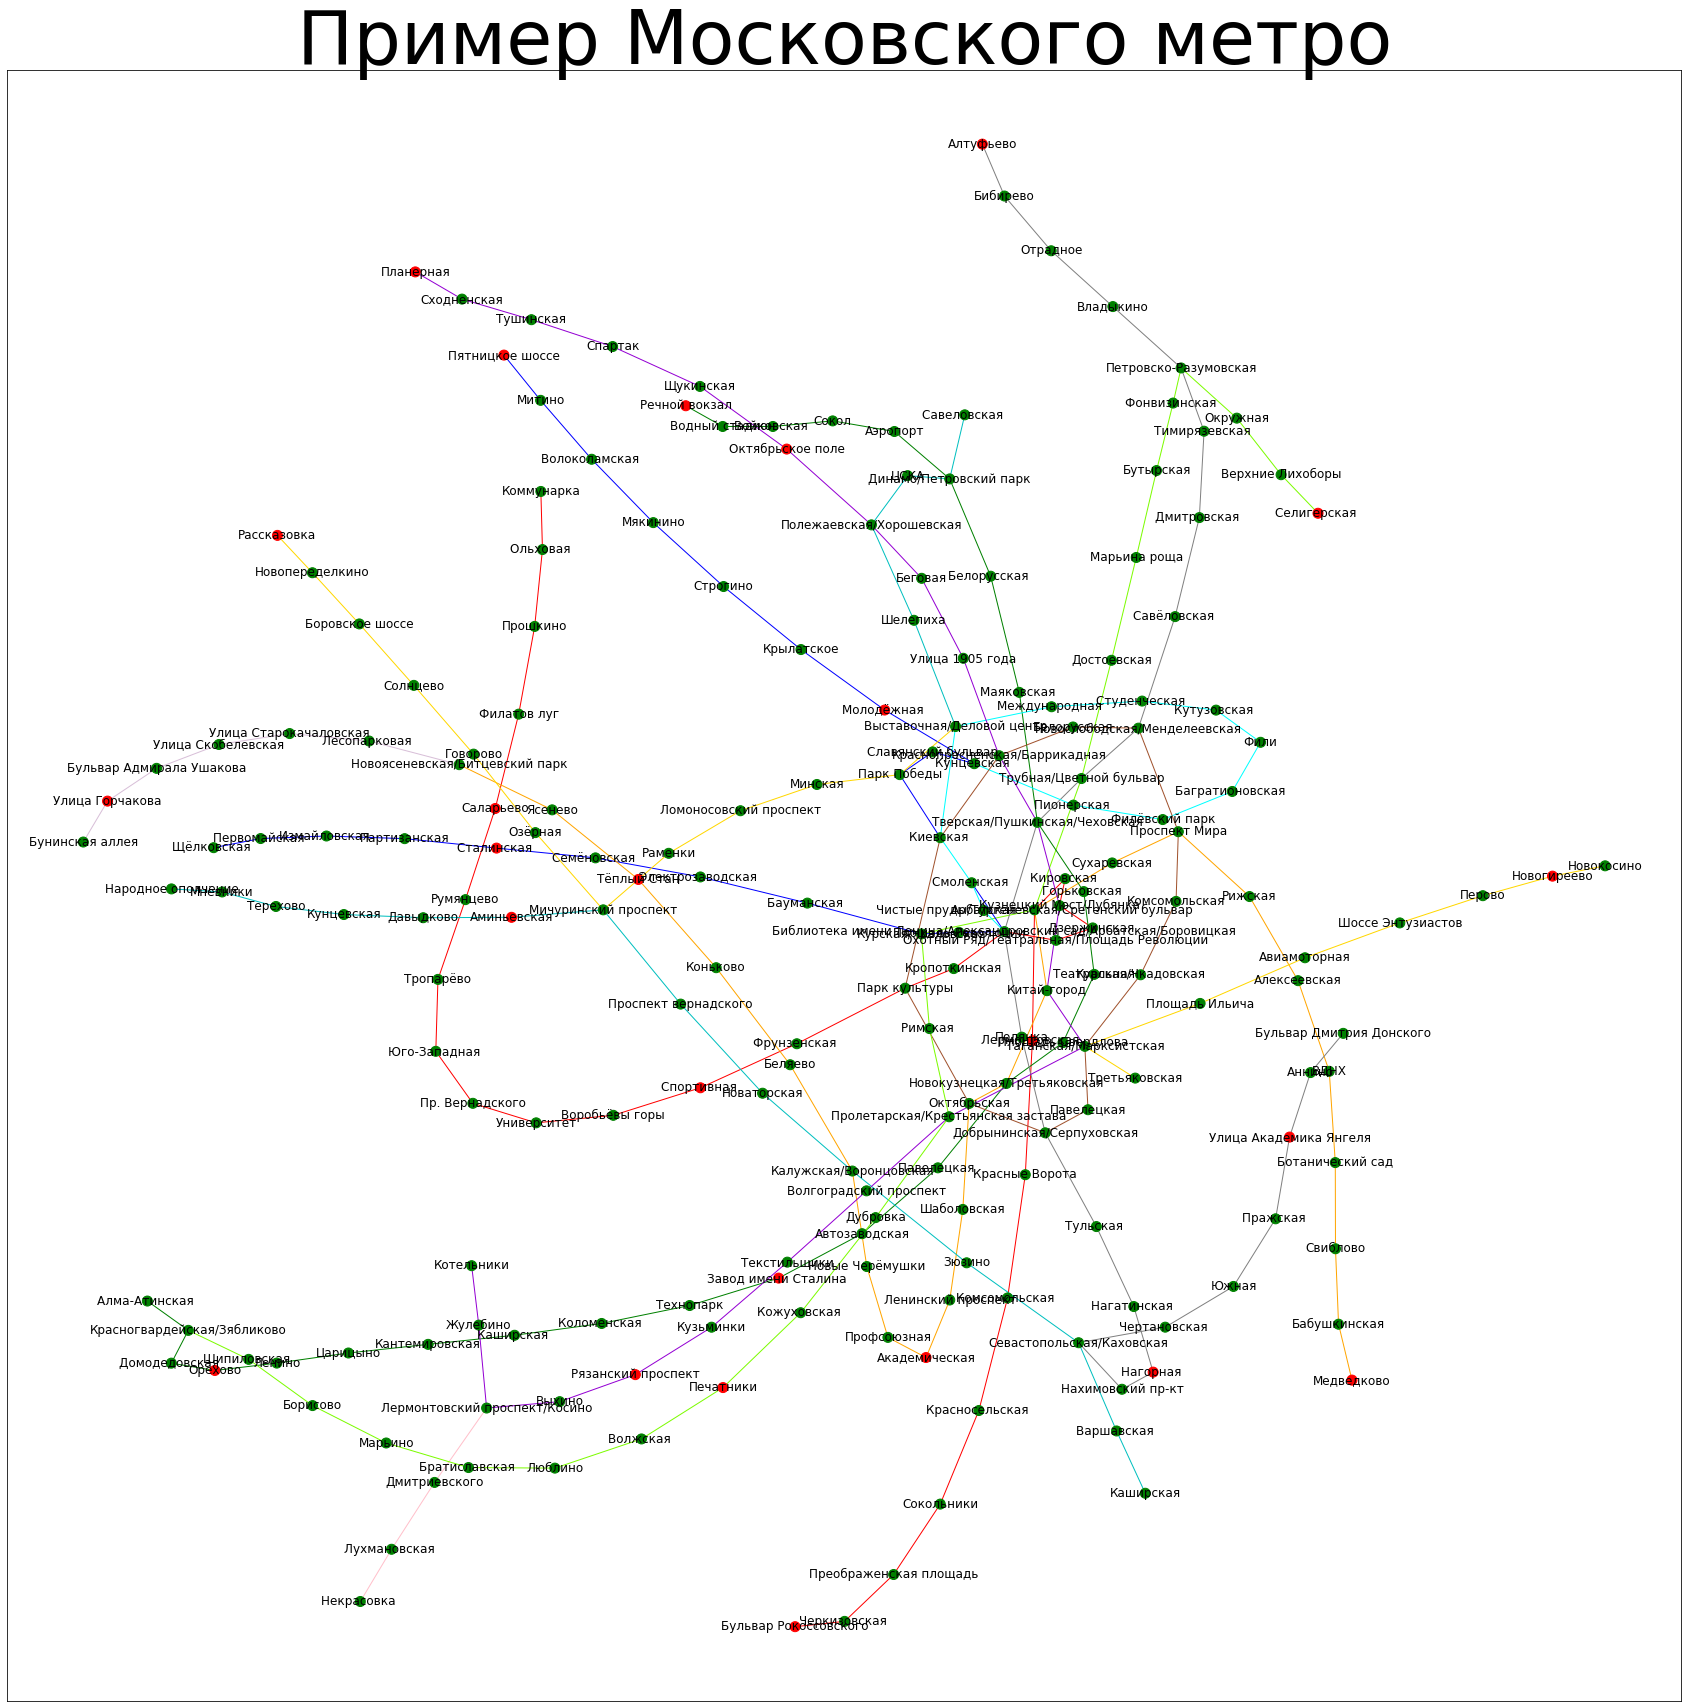

In [13]:
f = plt.figure(figsize=(30,30))
nx.draw_networkx(g,edge_color=a1,node_color=a3,node_size=100)
plt.title("Пример Московского метро",size=75)
plt.show()


In [14]:
points2 = min_points(b, a, 25)
print(points2)
print(len(points2))

['Бульвар Рокоссовского', 'Красные Ворота', 'Охотный Ряд/Театральная/Площадь Революции', 'Воробьёвы горы', 'Саларьево', 'Речной вокзал', 'Павелецкая ', 'Кантемировская', 'Алма-Атинская ', 'Пятницкое шоссе', 'Крылатское', 'Семёновская ', 'Багратионовская ', 'Медведково', 'Рижская', 'Академическая', 'Коньково', 'Планерная', 'Октябрьское поле', 'Волгоградский проспект', 'Жулебино', 'Перово', 'Рассказовка', 'Раменки', 'Алтуфьево', 'Тимирязевская ', 'Нагорная ', 'Пражская ', 'Волжская ', 'Терехово', 'Улица Старокачаловская']
31


In [15]:
#Массив цветов для точек станций с лавками и без
a4=[]
for i in b:
    if i in points2:
        a4.append('r') #Если нужно ставить лавку, то красный цвет станции
    else:
        a4.append('g') #Если не надо ставить лавку, то зеленый цвет станции

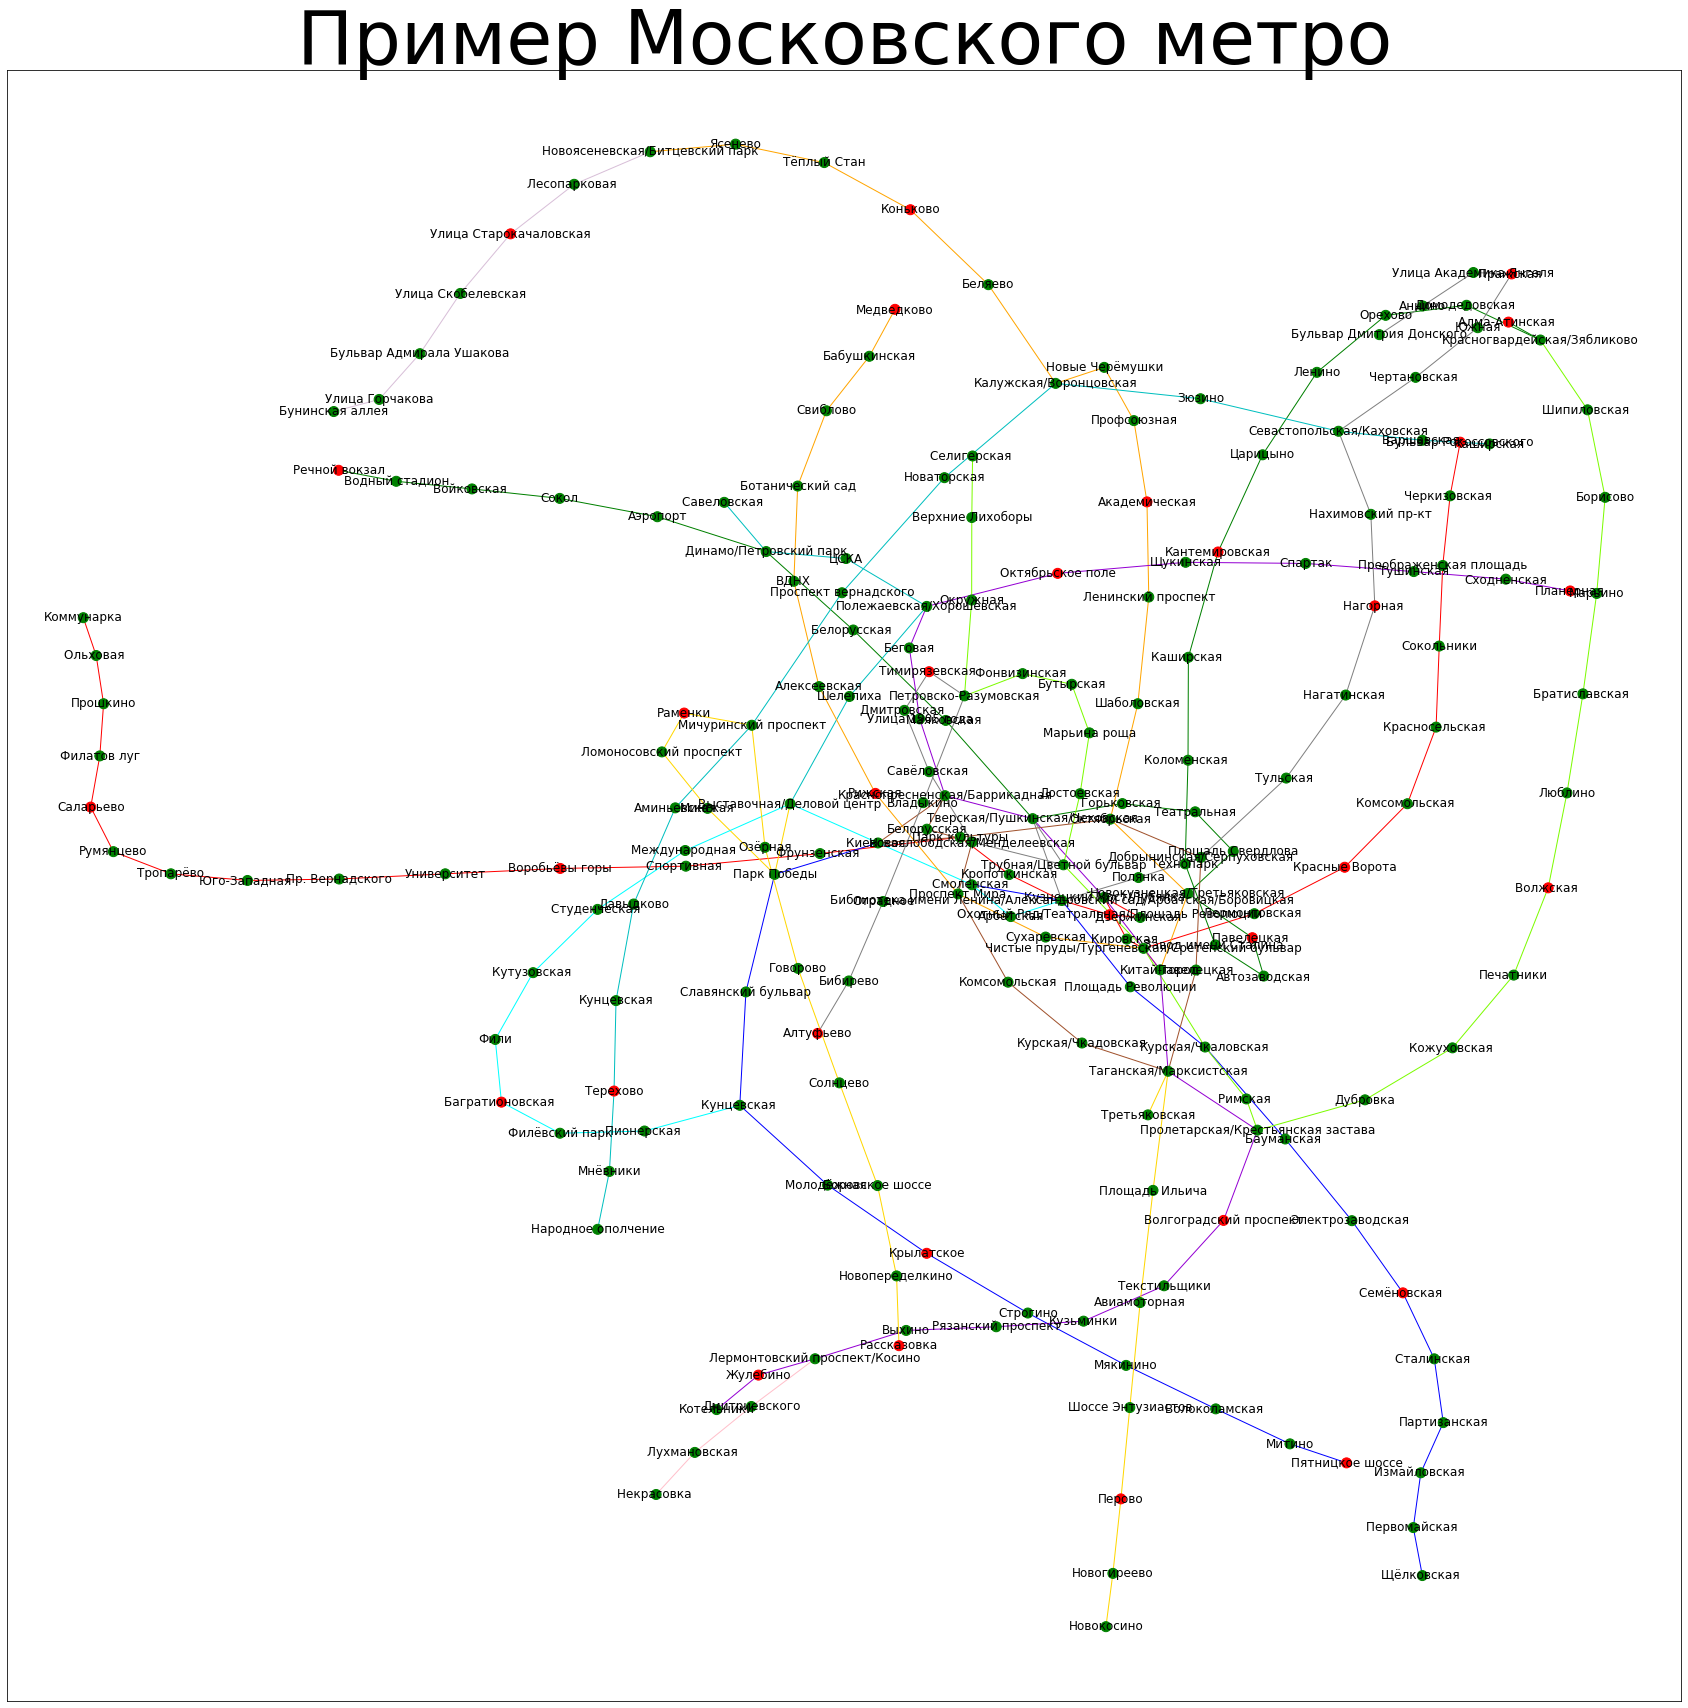

In [16]:
f = plt.figure(figsize=(30,30))
nx.draw_networkx(g,edge_color=a1,node_color=a4,node_size=100)
plt.title("Пример Московского метро",size=75)
plt.show()
